In [128]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv('data.csv')
df = df[df["Y"].between(df.Y.quantile(.05),df.Y.quantile(.95))]
y = pd.DataFrame(df['Y'])
X = df.drop('Y', axis = 1)
bins = np.linspace(y.min()[0],y.max()[0],10)
df = df.reset_index(drop = True)
y = pd.DataFrame(np.digitize(y, bins = bins))
df['Y'] = y

<AxesSubplot:>

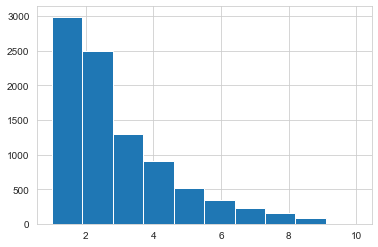

In [130]:
df.Y.hist()

In [131]:
df.Y.value_counts()

1     2990
2     2494
3     1295
4      901
5      511
6      342
7      222
8      156
9       88
10       1
Name: Y, dtype: int64

In [132]:
desc = pd.read_excel('data_description.xlsx')
desc_1 = desc[(~(desc.OPIS.str.contains('3')) & (~(desc.OPIS.str.contains('6'))))]
desc_3 = desc[desc.OPIS.str.contains('3')]
desc_3 = pd.concat([desc.iloc[:2], desc_3])
desc_6 = desc[desc.OPIS.str.contains('6')]
desc_6 = pd.concat([desc.iloc[:2], desc_6])
if len(desc_1)+len(desc_3)-2+len(desc_6)-2 == len(desc):
    print('all done')

all done


<AxesSubplot:>

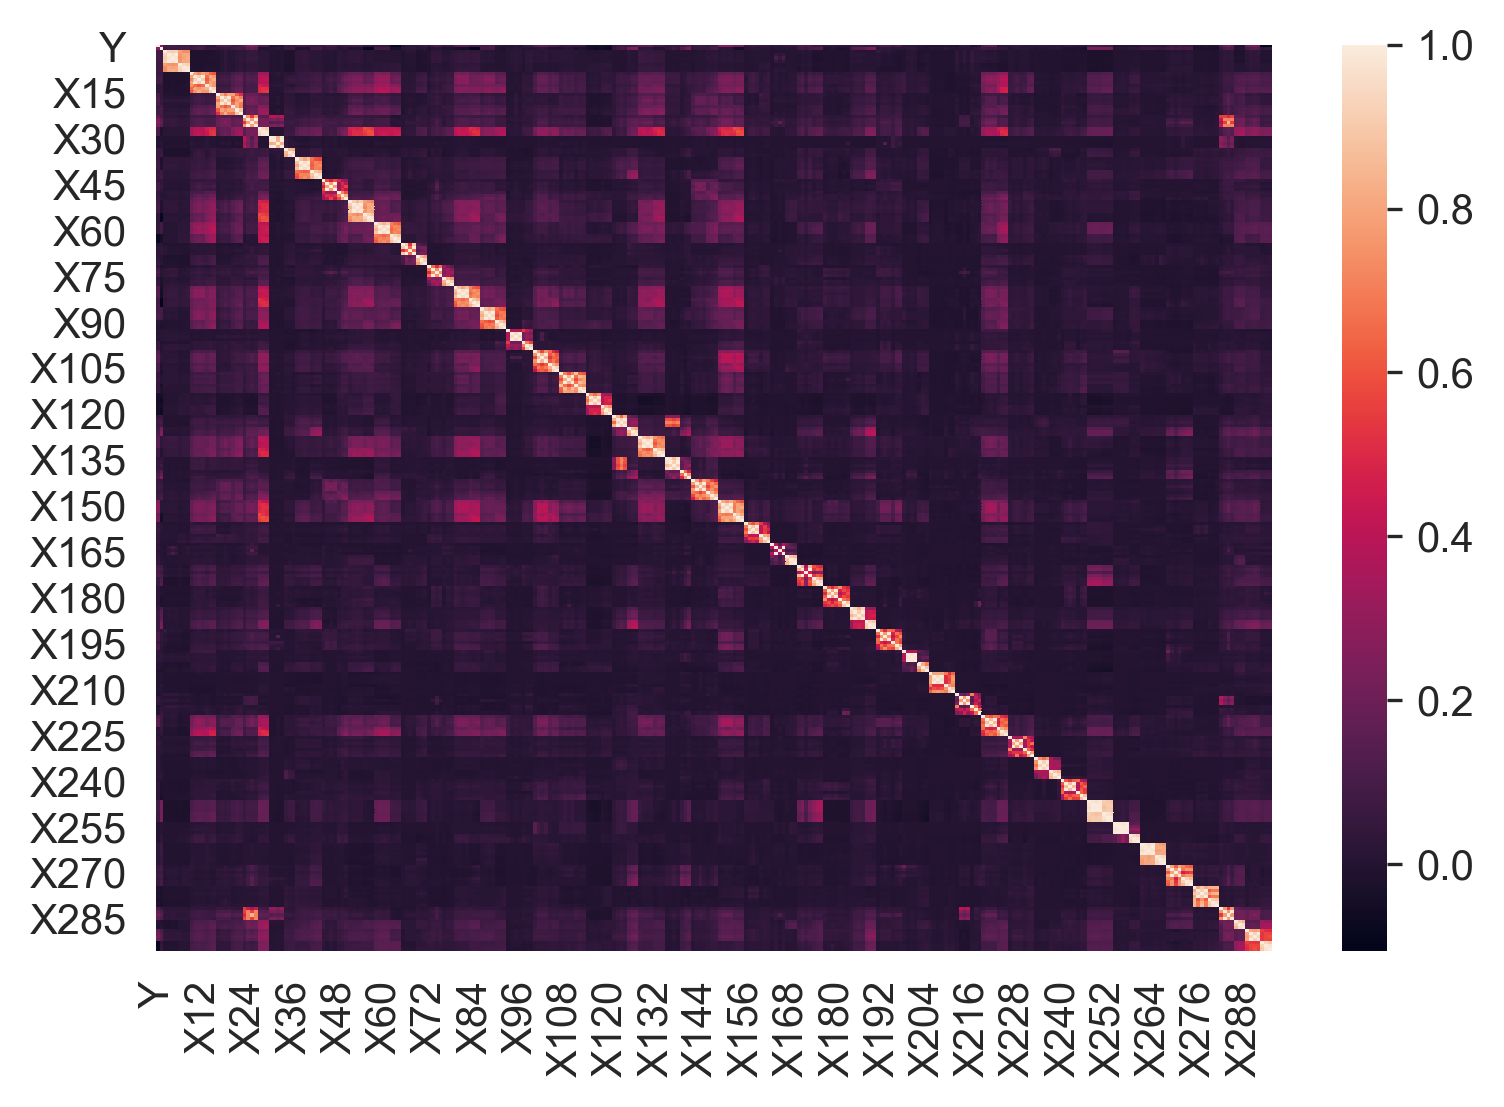

In [133]:
plt.figure(dpi=300)
sns.heatmap(df.corr())

In [134]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=len(X.columns)).fit((X).astype(int), y) #(10*X_train).astype(int)
feature_scoring = dict(zip(list(X.columns),list(selector.scores_)))

In [135]:
feature_scoring

{'X1': 958.8069374985902,
 'X2': 288430.16114729806,
 'X3': 779441.7633894419,
 'X4': 1499348.6969357177,
 'X5': 259826.28255321918,
 'X6': 86.63528126266921,
 'X7': 258.2549968941608,
 'X8': 520.0019187658205,
 'X9': 11140.644860405984,
 'X10': 39136.69760998152,
 'X11': 75252.30582029973,
 'X12': 13037.98733044414,
 'X13': 44.246382773357745,
 'X14': 95.16299253799897,
 'X15': 178.599111368314,
 'X16': 1304462.4548234316,
 'X17': 3103294.4235936236,
 'X18': 4974976.171041959,
 'X19': 1034032.8304394945,
 'X20': 344.7444942255905,
 'X21': 890.5654634362929,
 'X22': 1633.250181344555,
 'X23': 30824311.60979447,
 'X24': 90909112.32276578,
 'X25': 198256003.3125253,
 'X26': 30157339.708903186,
 'X27': 5887.906777888096,
 'X28': 16029.696021944686,
 'X29': 27982.62822958805,
 'X30': 1459982.367600235,
 'X31': 1075663.1771181512,
 'X32': 2807219.8460011547,
 'X33': 358693.8380362885,
 'X34': 122.75034469146452,
 'X35': 260.0914639390447,
 'X36': 383.37739386742305,
 'X37': 120367.154562654

In [136]:
score_value = []
feature_name = []
for i in range(1,len(list(selector.scores_))-2,3):
    score_value.append(max(list(selector.scores_)[i], list(selector.scores_)[i+1],list(selector.scores_)[i+2]))
    feature_name.append(list(X.columns)[list(selector.scores_).index(score_value[-1])])
best_feature_dict = dict(zip(feature_name, score_value))
bdf = df[df.columns.intersection(feature_name)]
bdf[['Y','X1']] = df[['Y','X1']]
bdf = bdf.reindex(sorted(bdf.columns), axis=1)
y = pd.DataFrame(bdf['Y'])
X = bdf.drop('Y', axis = 1)

pierwszy zakres to X2:X4, drugi X5:X7 itd

In [137]:
bdf

,X1,X10,X100,X102,X106,X109,X11,X110,X115,X116,...,X73,X74,X79,X81,X85,X88,X89,X94,X95,Y
0,27,331.3,0.0,0.0,0,0.0,388.4,0.0,0.0,0.0,...,0.0,0.0,4.5,13.0,2,15.8,5.2,0.0,0.0,1
1,27,156.5,0.0,0.0,0,0.0,360.6,0.0,0.0,0.0,...,208.7,336.7,180.9,709.7,27,277.0,47.4,0.0,0.0,3
2,33,377.8,0.0,0.0,0,0.0,513.9,0.0,0.0,0.0,...,249.0,668.0,98.4,235.0,6,0.0,0.0,0.0,0.0,6
3,34,405.0,0.0,0.0,0,0.0,417.9,0.0,0.0,0.0,...,0.0,0.0,21.9,422.6,28,1278.5,298.2,0.0,0.0,2
4,39,32.5,28.9,28.9,1,0.0,70.0,0.0,0.0,0.0,...,0.0,0.0,0.0,129.6,6,301.2,72.6,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,35,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1
8996,33,0.0,18.0,18.0,1,50.0,0.0,16.7,0.0,0.0,...,0.0,0.0,42.1,648.1,12,212.8,70.9,0.0,0.0,3
8997,23,147.0,24.0,41.1,3,0.0,147.0,0.0,1.7,1.7,...,0.0,0.0,34.0,112.7,6,634.4,208.3,0.0,0.0,1
8998,39,79.6,0.0,28.9,1,548.6,521.6,166.7,4.4,8.8,...,129.0,129.0,42.1,452.7,17,368.9,50.5,0.0,0.0,9


<AxesSubplot:>

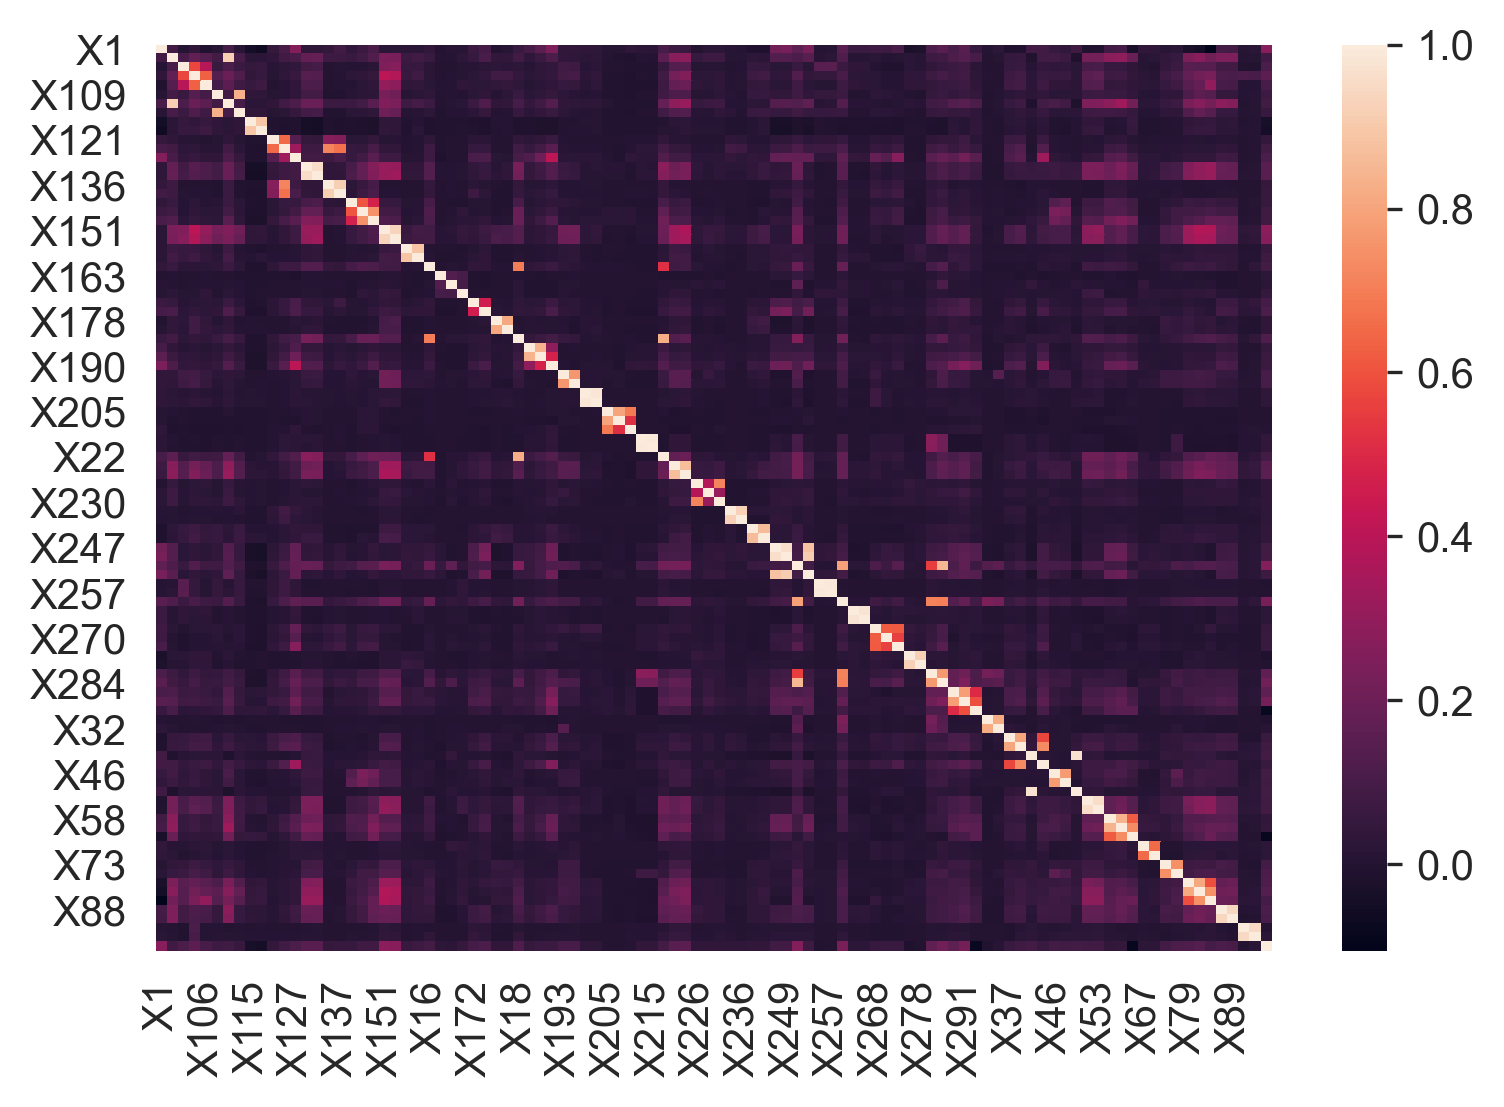

In [138]:
plt.figure(dpi=300)
sns.heatmap(bdf.corr())

delete comments below, add k = .. for dimension reduction

In [148]:
chi_best_k = SelectKBest(chi2, k=20).fit((10*X).astype(int), y) #(10*X_train).astype(int)

chi_best_feats = []
for i in range(len(list(chi_best_k.get_support()))):
    if list(chi_best_k.get_support())[i] == True:
        chi_best_feats.append(list(X.columns)[i])

bdf = df[df.columns.intersection(chi_best_feats)]
bdf[['Y','X1']] = df[['Y','X1']]
bdf = bdf.reindex(sorted(bdf.columns), axis=1)
y = pd.DataFrame(bdf['Y'])
X = bdf.drop('Y', axis = 1)

In [149]:
bdf

,X1,X123,X151,X16,X163,X165,X172,X18,X221,X25,...,X283,X284,X289,X291,X30,X32,X39,X4,X46,Y
0,27,544.5,123.5,13000.0,0.0,0.0,0.0,13000.0,668.2,161320.6,...,45212.1,200982.6,6883.0,43137.0,8.0,18.0,40.0,0.0,0.0,1
1,27,0.0,1283.8,0.0,0.0,0.0,0.0,0.0,879.3,93586.4,...,45500.0,63000.0,0.0,0.0,0.0,0.0,11460.0,0.0,208.9,3
2,33,0.0,3209.2,0.0,100000.0,120000.0,0.0,0.0,41.5,506052.9,...,153885.3,361723.3,15359.4,92210.3,0.0,0.0,652.3,0.0,0.0,6
3,34,0.0,803.8,2000.0,0.0,0.0,0.0,2460.0,2974.7,204364.6,...,75979.6,103163.0,7375.3,38992.3,0.0,0.0,500.0,0.0,0.0,2
4,39,0.0,46.2,0.0,0.0,0.0,0.0,1900.0,1138.4,42664.0,...,74098.3,93235.0,4262.5,29670.8,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,35,610.8,0.0,0.0,0.0,0.0,1967.5,0.0,0.0,61723.0,...,29083.9,55805.6,6471.8,43308.2,0.0,0.0,3593.2,0.0,0.0,1
8996,33,0.0,1425.0,60.0,0.0,0.0,0.0,260.0,445.6,102040.8,...,43159.7,73382.4,9156.8,63623.8,0.0,0.0,462.3,0.0,0.0,3
8997,23,0.0,299.0,0.0,0.0,0.0,0.0,700.0,189.5,30402.5,...,12760.0,25946.3,4357.0,22976.0,0.0,0.0,0.0,0.0,70.0,1
8998,39,0.0,1293.2,0.0,0.0,0.0,4800.0,1600.0,2874.4,332920.6,...,56185.5,145331.1,4028.4,32524.2,50.0,300.0,5311.8,0.0,0.0,9


<AxesSubplot:>

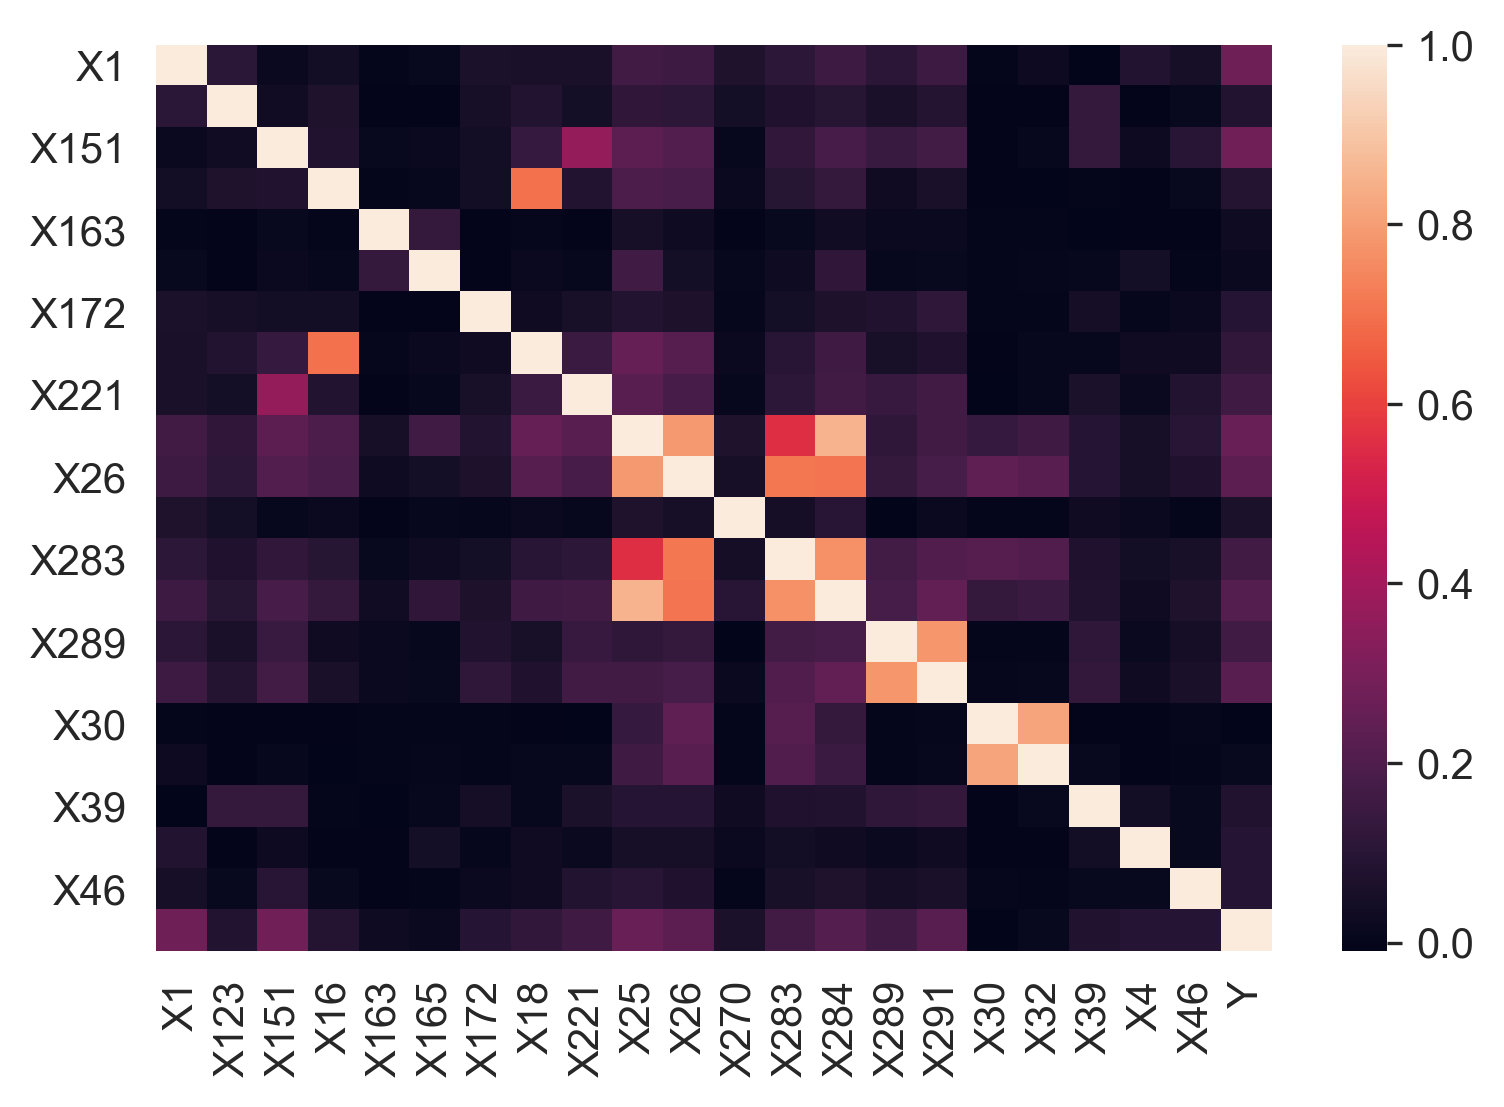

In [150]:
plt.figure(dpi=300)
sns.heatmap(bdf.corr())

<AxesSubplot:>

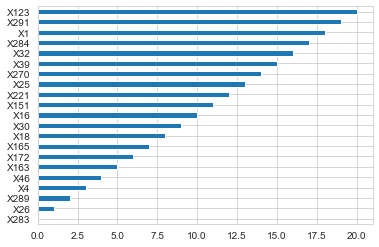

In [153]:
from skfeature.function.similarity_based import fisher_score
 
ranks = fisher_score.fisher_score(X.to_numpy(), y.values.ravel())
 
feature_ranks = pd.Series(ranks, X.columns).sort_values()
feature_ranks.plot(kind = 'barh')

<AxesSubplot:>

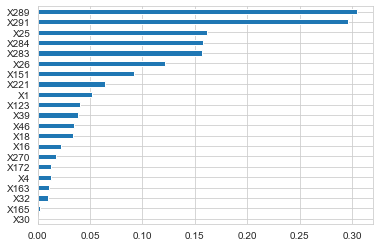

In [154]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X.to_numpy(), y.values.ravel())
 
feat_importances = pd.Series(importances, X.columns).sort_values()
feat_importances.plot(kind = 'barh')

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bdf, train_size = 0.9)#, stratify = bdf['Y'])
X_train = df_train.drop('Y', axis = 1)
y_train = df_train.Y
X_test = df_test.drop('Y', axis = 1)
y_test = df_test.Y

In [96]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
mse = mean_squared_error(y_test, lr.predict(X_test))
print(type(lr))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f'train: {lr.score(X_train, y_train)}')
print(f'test: {lr.score(X_test, y_test)}')

<class 'sklearn.linear_model._base.LinearRegression'>
The mean squared error (MSE) on test set: 2.7044
train: 0.20341259041271276
test: 0.2265937862839269


In [97]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state = 0).fit(X_train, y_train)
mse = mean_squared_error(y_test, forest.predict(X_test))
print(type(forest))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f'train: {forest.score(X_train, y_train)}')
print(f'test: {forest.score(X_test, y_test)}')

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
The mean squared error (MSE) on test set: 2.5956
train: 0.9890123456790123
test: 0.5744444444444444


In [98]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print(type(reg))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f'train: {reg.score(X_train, y_train)}')
print(f'train: {reg.score(X_test, y_test)}')

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
The mean squared error (MSE) on test set: 1.9676
train: 0.4610607368762233
train: 0.4372927560786527


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
mse = mean_squared_error(y_test, gbrt.predict(X_test))
print(type(gbrt))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f'train: {gbrt.score(X_train, y_train)}')
print(f'train: {gbrt.score(X_test, y_test)}')

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
The mean squared error (MSE) on test set: 2.6400
train: 0.6638271604938272
train: 0.5277777777777778


In [100]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0,activation = 'relu',hidden_layer_sizes=[10, 10]).fit(X_train, y_train)

In [101]:
mlp.score(X_train,y_train)

0.33185185185185184

<AxesSubplot:>

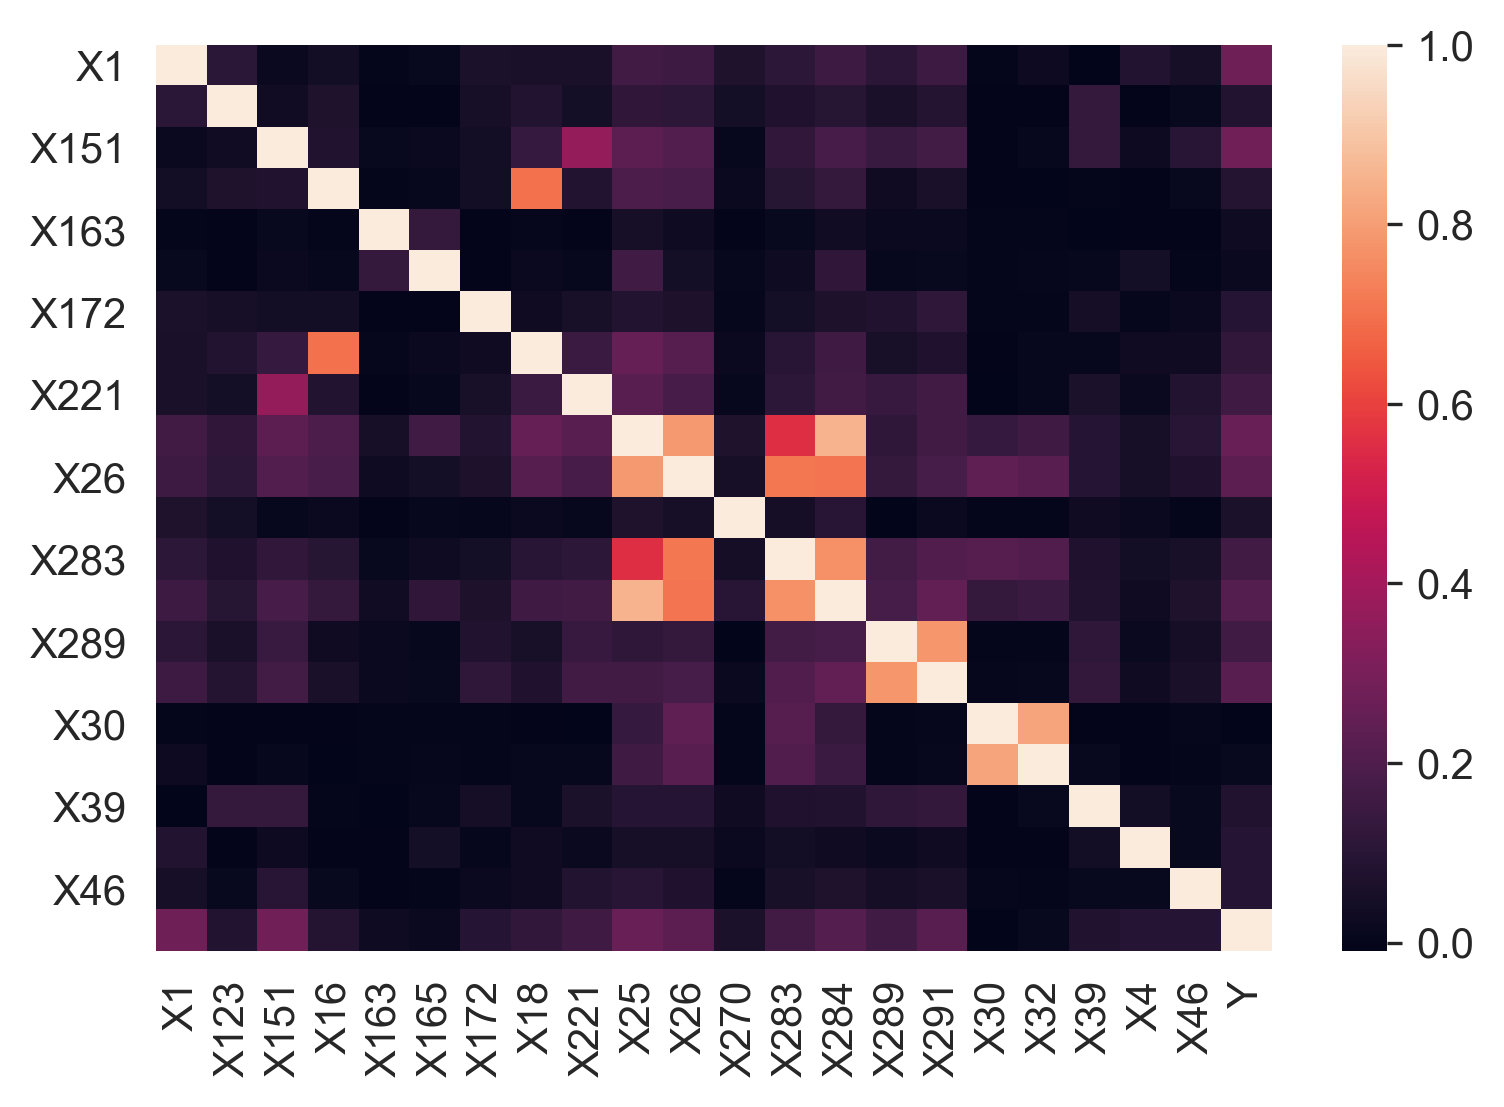

,X1,X10,X100,X102,X106,X109,X11,X110,X115,X116,...,X68,X73,X74,X79,X81,X85,X88,X89,X94,X95
0,27,331.3,0.0,0.0,0,0.0,388.4,0.0,0.0,0.0,...,0.0,0.0,0.0,4.5,13.0,2,15.8,5.2,0.0,0.0
1,27,156.5,0.0,0.0,0,0.0,360.6,0.0,0.0,0.0,...,0.0,208.7,336.7,180.9,709.7,27,277.0,47.4,0.0,0.0
2,33,377.8,0.0,0.0,0,0.0,513.9,0.0,0.0,0.0,...,0.0,249.0,668.0,98.4,235.0,6,0.0,0.0,0.0,0.0
3,34,405.0,0.0,0.0,0,0.0,417.9,0.0,0.0,0.0,...,0.0,0.0,0.0,21.9,422.6,28,1278.5,298.2,0.0,0.0
4,39,32.5,28.9,28.9,1,0.0,70.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,129.6,6,301.2,72.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,35,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
8996,33,0.0,18.0,18.0,1,50.0,0.0,16.7,0.0,0.0,...,0.0,0.0,0.0,42.1,648.1,12,212.8,70.9,0.0,0.0
8997,23,147.0,24.0,41.1,3,0.0,147.0,0.0,1.7,1.7,...,52.7,0.0,0.0,34.0,112.7,6,634.4,208.3,0.0,0.0
8998,39,79.6,0.0,28.9,1,548.6,521.6,166.7,4.4,8.8,...,0.0,129.0,129.0,42.1,452.7,17,368.9,50.5,0.0,0.0
